In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
# from bokeh.io import output_notebook
# output_notebook();
import matplotlib.pyplot as plt

from dquartic.utils.data_loader import DIAMSDataset
from dquartic.model.building_blocks import CustomTransformer
from dquartic.model.model import DDIMDiffusionModel
from torch.utils.data import DataLoader

# set global plotting backend for pandas
pd.options.plotting.backend = "ms_matplotlib" # one of: "ms_bokeh" "ms_matplotlib" "ms_plotly"

In [2]:
ms2_data_path = "../data/ms2_data_cat_int32.npy"
ms1_data_path = "../data/ms1_data_int32.npy"
dataset = DIAMSDataset(ms2_data_path, ms1_data_path, normalize=True)
data_loader = DataLoader(dataset, batch_size=1, shuffle=True, num_workers=1)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
model = CustomTransformer(input_dim=40000, hidden_dim=1024, num_heads=8, num_layers=8).to(device)
diffusion_model = DDIMDiffusionModel(model_class=model, num_timesteps=1000, device=device)
diffusion_model

DDIMDiffusionModel with CustomTransformer model with 191126592 parameters on cpu

In [3]:
ckpnt = "../save_models/best_model.pth"
epoch, best_loss, _ = diffusion_model.load_checkpoint(None, ckpnt, device)

Loading checkpoint from ../save_models/best_model.pth...
Resumed from (../save_models/best_model.pth) epoch 1322, best loss 0.000010


/home/singjc/anaconda3/envs/dquartic/lib/python3.10/site-packages/pyopenms_viz/_matplotlib/core.py:102: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  ax.grid(self.grid, zorder=0)


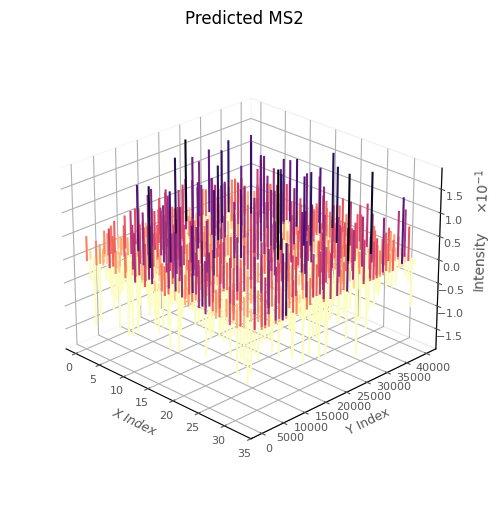

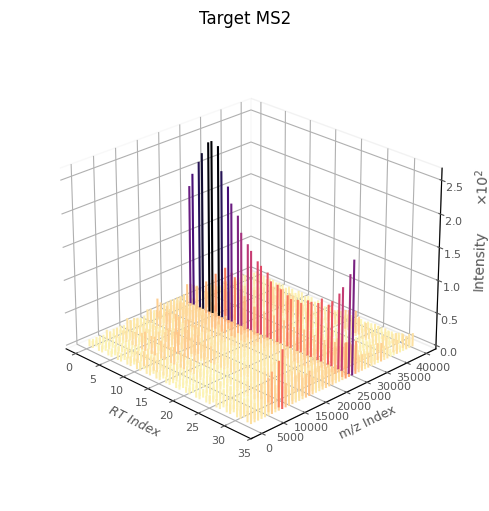

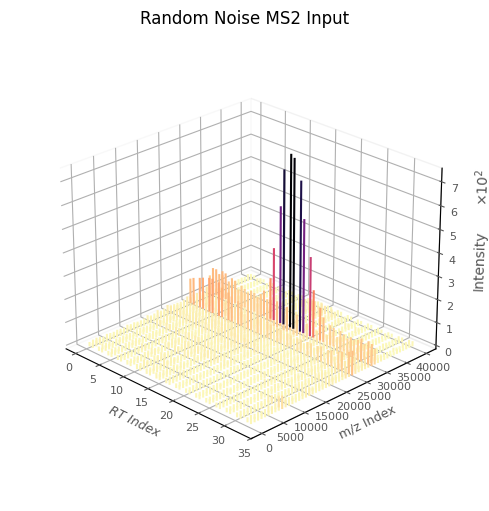

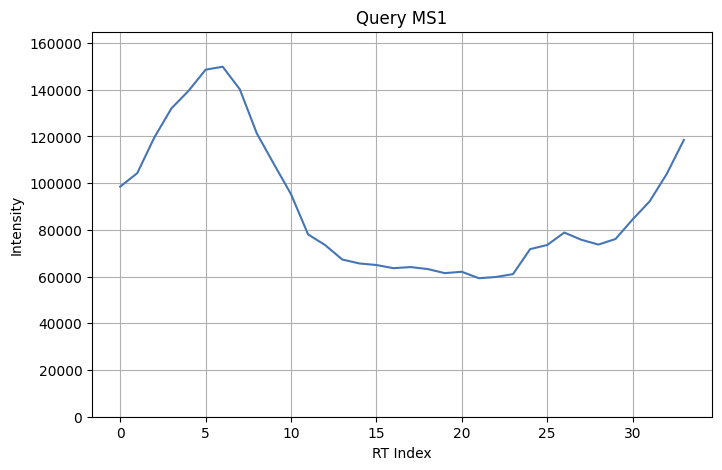

In [4]:
ms2_target_plot, ms1_plot, ms2_input_plot, pred_plot = diffusion_model.plot_single_prediction(data_loader, num_steps=100, eta=0.0)